In [1]:
from matplotlib import pyplot as plt
from PIL import Image

import sys
import os
sys.path.insert(0, "../packages/python")
from data import utils as data_utils
from data import augmentation as data_augmentation

In [2]:
IMAGES_FOLDER = "../untracked/datasets/Abril2023/uploaded"
OUTPUT_FOLDER = "../untracked/datasets/Abril2023/raw_dataset"
# OUTPUT_FOLDER = "" # No guardar nada

# ANNOTATION_FILE = "corte-28-10-2023.json"
# ANNOTATION_FILE = "corte-27-02-2024.json" 
# ANNOTATION_FILE = "corte-13-03-2024.json" 
ANNOTATION_FILE = "corte-21-04-2024.json" 
ANNOTATION_FILE = os.path.join("../untracked/datasets/Abril2023/", ANNOTATION_FILE)




In [3]:
images, masks, metadata = data_utils.process_dataset_annotations(IMAGES_FOLDER, ANNOTATION_FILE, OUTPUT_FOLDER)

Deleting output path.
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Found 58 annotations


100%|██████████| 58/58 [00:24<00:00,  2.37it/s]


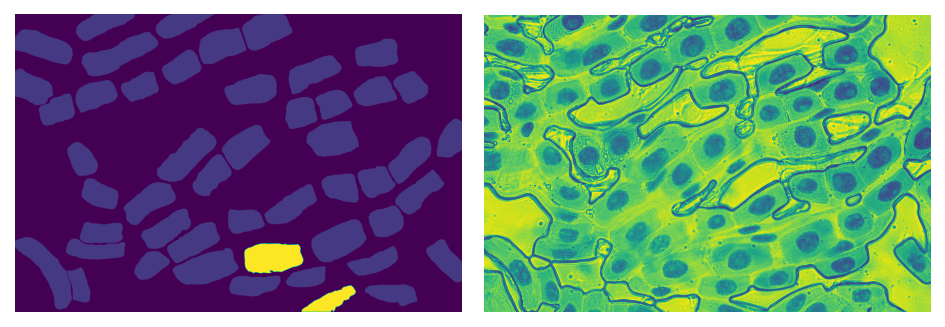

In [4]:
sample_show = 22
image_use = Image.fromarray(images[sample_show, :, :, 0])
mask_use = Image.fromarray(masks[sample_show, :, :, 0])

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(mask_use)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(image_use)
plt.axis("off")
plt.tight_layout()
plt.show()


In [5]:
from importlib import reload
reload(data_utils)

<module 'data.utils' from '/home/rawthil/Documents/GIAR/INA/INA_code/giar_ina_dev/notebooks/../packages/python/data/utils.py'>

In [6]:
files_dict = data_utils.find_files(OUTPUT_FOLDER, "png")

In [7]:
from importlib import reload
reload(data_augmentation)

<module 'data.augmentation' from '/home/rawthil/Documents/GIAR/INA/INA_code/giar_ina_dev/notebooks/../packages/python/data/augmentation.py'>

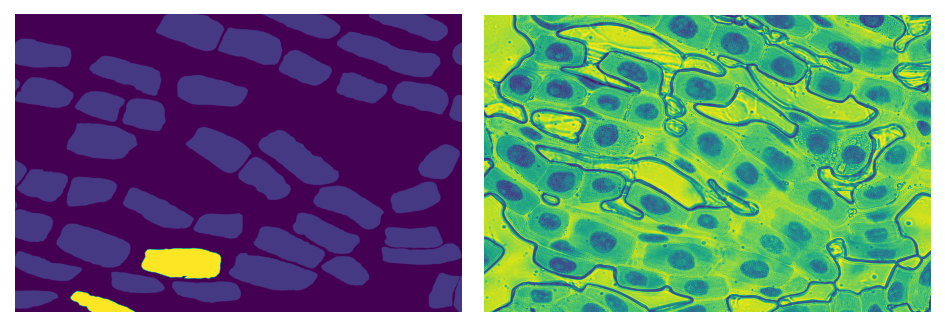

In [8]:
image_changed, mask_use_changed = data_augmentation.change_image_basic(image_use, mask_use)

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(mask_use_changed)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(image_changed)
plt.axis("off")
plt.tight_layout()
plt.show()

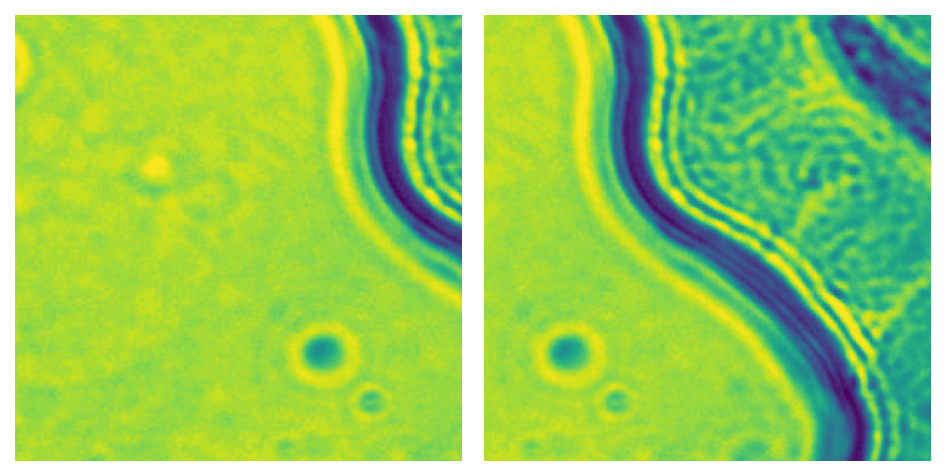

In [9]:
cut_list = data_augmentation.cut_image(image_changed, 256, 256, 128, 128)

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(cut_list[0])
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(cut_list[1])
plt.axis("off")
plt.tight_layout()
plt.show()

In [42]:
from importlib import reload
reload(data_utils)

<module 'data.utils' from '/home/rawthil/Documents/GIAR/INA/INA_code/giar_ina_dev/notebooks/../packages/python/data/utils.py'>

In [28]:
metadata_balanced = data_utils.metadata_balanced(metadata)

total by category :
	Interfase = 58
	Profase = 29
	Metafase = 11
	Anafase = 11
	Telofase = 32
	Desconocido = 47
updated total by category  :
	Interfase = 25
	Profase = 15
	Metafase = 11
	Anafase = 4
	Telofase = 15
	Desconocido = 18


In [47]:
OUTPUT_FOLDER_BALANCED = "../untracked/datasets/Abril2023"
train_images, train_target, validation_images, validation_target, metadata_new = data_utils.create_dataset(OUTPUT_FOLDER, "balanced_dataset", metadata_balanced, output_path=OUTPUT_FOLDER_BALANCED)

In [49]:
metadata_new

,image,Fondo,Interfase,Profase,Metafase,Anafase,Telofase,Desconocido,split
0,343.png,True,True,True,False,False,False,False,Train
1,345.png,True,True,True,False,True,True,False,Train
2,346.png,True,True,True,True,False,False,False,Train
3,350.png,True,True,False,True,False,False,True,Train
4,351.png,True,True,False,False,False,False,True,Train
5,352.png,True,True,False,True,True,True,True,Train
6,354.png,True,True,False,False,False,False,True,Train
7,358.png,True,True,True,False,False,False,True,Train
8,360.png,True,True,False,False,False,True,False,Train
9,364.png,True,True,False,False,False,True,False,Train
